In [1]:
# load pandas (always do this first)
import pandas as pd
#import numpy as np

In [2]:
firearms_data = pd.read_csv("firearms_data.csv", index_col="_id", usecols = ['_id', 'total_count', 'neighborhood'])

In [3]:
#firearms_data = firearms_data.dropna(axis = 0, how = 'any', ) # trying to remove rows with no neighborhood defined 

In [4]:
firearms_data.head(15)

,total_count,neighborhood
_id,,
0,2,Mount Oliver Borough
1,1,Sheraden
2,1,Terrace Village
3,1,Brighton Heights
4,1,NaN
5,1,Westwood
6,1,East Liberty
7,2,Upper Lawrenceville
8,1,Marshall-Shadeland


In [5]:
firearms_data.pivot(columns="neighborhood", values="total_count").head()

neighborhood,NaN,Allegheny Center,Allegheny West,Allentown,Arlington,Arlington Heights,Banksville,Bedford Dwellings,Beechview,Beltzhoover,...,Strip District,Summer Hill,Terrace Village,Troy Hill,Upper Hill,Upper Lawrenceville,West End,West Oakland,Westwood,Windgap
_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
firearms_data.groupby("neighborhood").count()

,total_count
neighborhood,
Allegheny Center,9
Allegheny West,15
Allentown,48
Arlington,22
Arlington Heights,8
...,...
Upper Lawrenceville,10
West End,3
West Oakland,12


In [7]:
def filter_greater_than(x, threshold):
    if len(x)>threshold:
        return True
    else:
        return False

# use the custom function to filter out rows
most_dangerous = firearms_data.groupby("neighborhood").filter(filter_greater_than, 
                                                     threshold=29)
# look at what centers are in the data now
most_dangerous.groupby('neighborhood').count()

,total_count
neighborhood,
Allentown,48
Bedford Dwellings,52
Beechview,46
Beltzhoover,36
Bloomfield,30
Bluff,34
Brighton Heights,54
Brookline,37
Carrick,86


In [8]:
len(most_dangerous["neighborhood"].unique()) #making sure that we have a usable amount of neighborhoods (hoping for no more than 25)

35

In [9]:
#most_dangerous.groupby('neighborhood').plot.bar(x = "neighborhood", figsize=(10,10))

I was hoping that that ^ would work, but instead of one graph with 20 bars, I got 20 graphs with all of the individual reports for each of the top 20 neighborhoods. Now I'm going to try to figure something else out!

In [10]:
#most_dangerous = most_dangerous.groupby('neighborhood')
#most_dangerous.plot.bar(x = "neighborhood", figsize=(10,10))

#^this turned out to be the same as the one before it

In [11]:
most_firearms = most_dangerous.groupby('neighborhood').count()

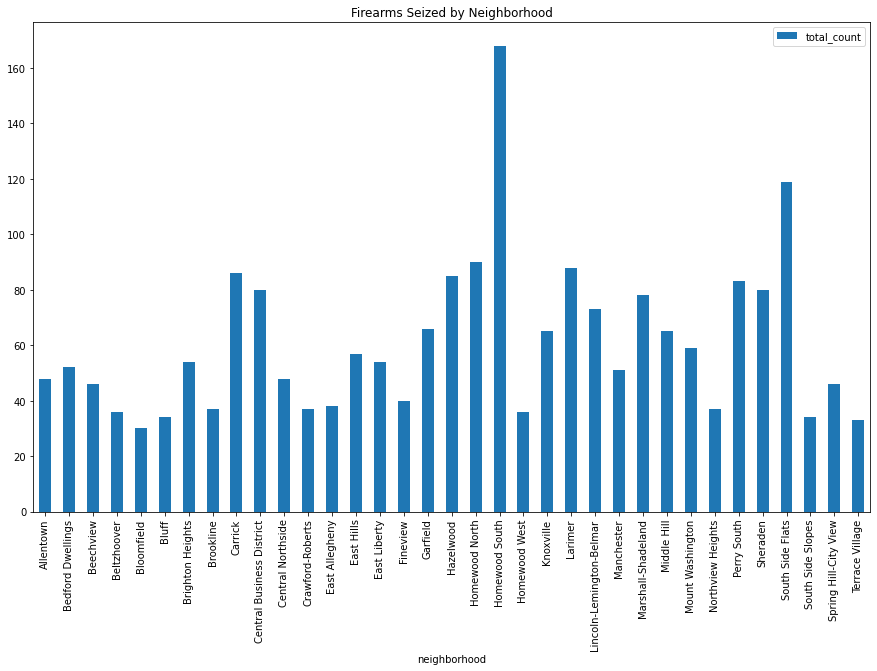

In [13]:
most_firearms.plot.bar(title = "Firearms Seized by Neighborhood", figsize=(15, 9), stacked = True)

In [54]:
#sorting the data to see which one is actually most dangerous
most_firearms = most_firearms.sort_values("total_count", ascending = False)

**Conclusion**

The dataset I used was the "Pittsburgh Police Firearm Seizures" from the Pittsburgh Police. Our group decided to choose the best neighborhood by choosing which neighborhood is "best" at being the worst, or most dangerous. The best-worst neighborhood for me was Homewood South since it had the most gun seizures at 168, followed by South Side Flats and then Homewood North with 119 and 90 respectively. I believe that my data is a good representation of the neighborhood that is the best because, according to the Police data report, firearms are seized when they are suspected to be used in a criminal offense. There is therefore a direct correlation between guns seized and how dangerous a neighborhood is, so the more guns seized, the more dangerous the neighborhood. I ultimately excluded neighborhoods that had less than 50 gun seizures, not because they were interfering with data in any way, but because I wanted to eliminate the amount of data I was working with, and ended up with approximately 20 neighborhoods that had over 50 guns seized. In conclusion, according to gun seizures, Homewood South is bar far the best-worst neighborhood to reside in.

In [55]:
result_firearms = most_firearms.to_csv("result_firearms.csv")